In [1]:
import importlib
import logging
import time

import matplotlib.pyplot as plt
import numba
import numpy as np

import deduce_asymptotics
from deduce_asymptotics import deduce_asymptotics as deduce

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

In [2]:
def insertion_sort(input_data: list) -> None:
    for i in range(1, len(input_data)):
        j = i
        while j > 0 and input_data[j - 1] > input_data[j]:
            input_data[j - 1], input_data[j] = input_data[j], input_data[j - 1]
            j -= 1

def selection_sort(input_data: list) -> None:
    for i in range(len(input_data) - 1):
        min_index = i
        for j in range(i + 1, len(input_data)):
            if input_data[j] < input_data[min_index]:
                min_index = j
        input_data[i], input_data[min_index] = input_data[min_index], input_data[i]

def log_search(input_data: list, key: int=0) -> int:
    i = len(input_data) // 2
    j = 0
    while i >= j:
        if input_data[i] == key:
            return i
        elif input_data[i] > key:
            j = i + 1
        else:
            i = i - 1
    return -1

2024-07-19 10:27:33,193 - Collecting data for insertion_sort...
2024-07-19 10:27:33,201 - Iteration   0. Input length: 32, Avg time: 0.0004949 ± 0.0003531 seconds
2024-07-19 10:27:33,209 - Iteration   1. Input length: 64, Avg time: 0.001288 ± 0.0004198 seconds
2024-07-19 10:27:33,233 - Iteration   2. Input length: 128, Avg time: 0.004181 ± 0.0004519 seconds
2024-07-19 10:27:33,320 - Iteration   3. Input length: 256, Avg time: 0.01672 ± 0.003478 seconds
2024-07-19 10:27:33,567 - Iteration   4. Input length: 512, Avg time: 0.04907 ± 0.005607 seconds
2024-07-19 10:27:34,510 - Iteration   5. Input length: 1024, Avg time: 0.1882 ± 0.03224 seconds
2024-07-19 10:27:37,900 - Iteration   6. Input length: 2048, Avg time: 0.6773 ± 0.03278 seconds
2024-07-19 10:27:50,635 - Iteration   7. Input length: 4096, Avg time: 2.547 ± 0.04836 seconds
2024-07-19 10:28:40,672 - Iteration   8. Input length: 8192, Avg time: 10.01 ± 0.1536 seconds
2024-07-19 10:28:40,673 - Starting the fit...
2024-07-19 10:28:40

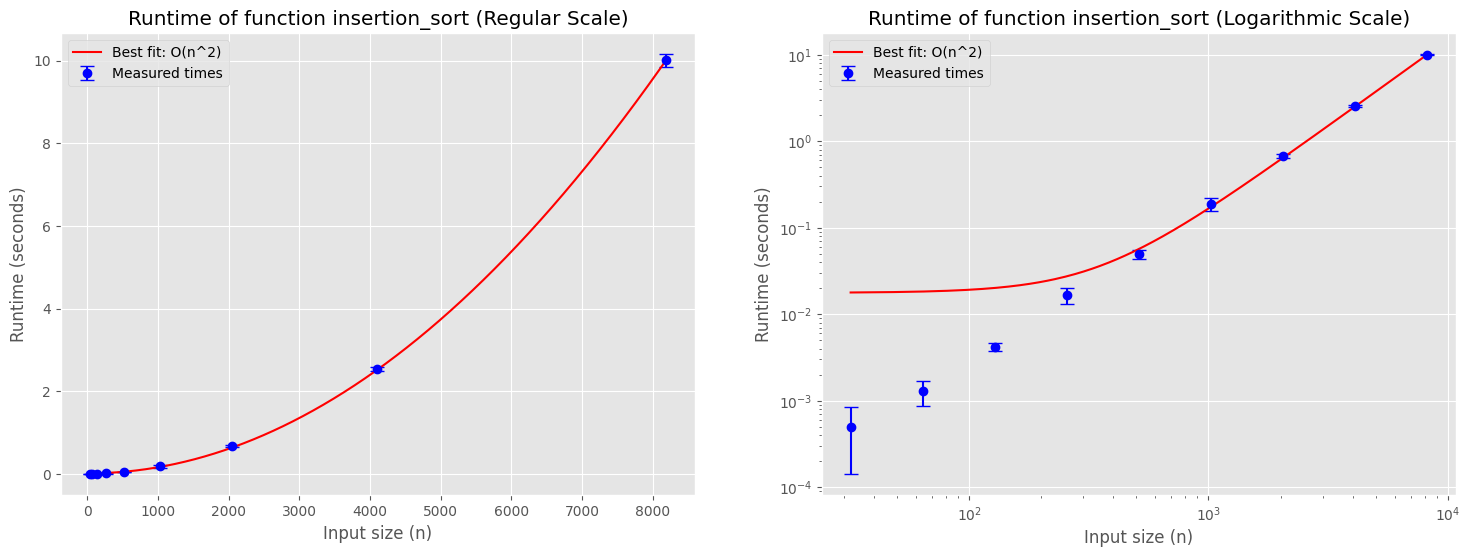

Time complexity of the function insertion_sort is O(n^2)


In [3]:
importlib.reload(deduce_asymptotics)

def build_input_sorted(n: int) -> list:
    x = np.random.randint(0, 1000, size=n)
    x = np.sort(x)
    return x

def build_input(n: int) -> list:
    x = np.random.randint(0, 1000, size=n)
    return x


# deduce(build_input_sorted, log_search, time_budget=60, num_samples=5)
deduce(build_input, insertion_sort, time_budget=60, num_samples=5)